<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter('ignore') 

from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


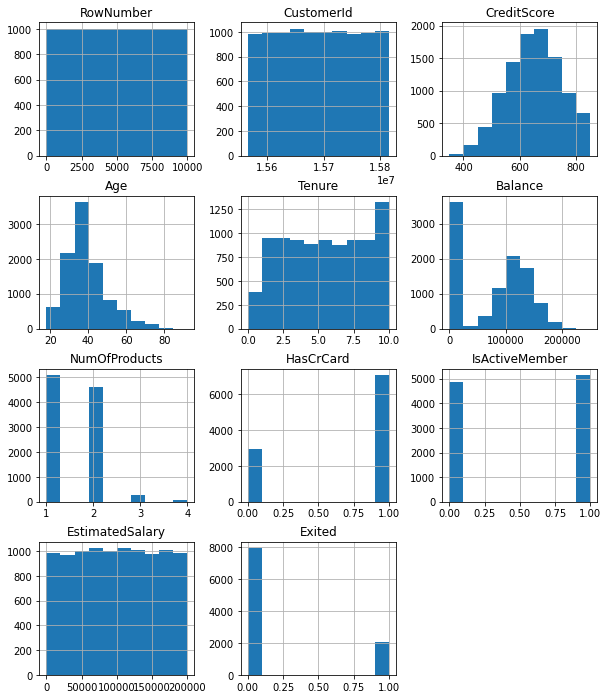

In [5]:
df.hist(figsize=(10, 12))
None

Визуально, пожалуй только признак CreditScore распределен нормально, Age близок к нормальному распределению. 
Посмотрим визуально на матрице корреляции взаимозависимости признаков.

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.007322   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.021418   
CreditScore       0.005840    0.005308     1.000000 -0.003965 -0.000062   
Age               0.000783    0.009497    -0.003965  1.000000 -0.013134   
Tenure           -0.007322   -0.021418    -0.000062 -0.013134  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.007911   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.011979   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.027232   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.032178   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.010520   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.016761   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

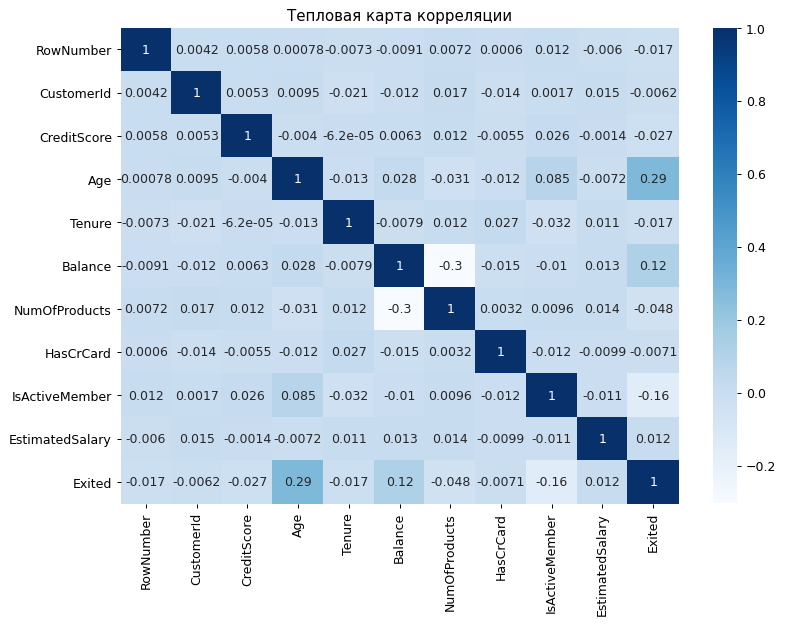

In [6]:
print(df.corr())

plt.figure(figsize=(10,7),dpi=90)
df_plot = sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.title('Тепловая карта корреляции')
plt.show()

В столбце Tenure 909 прорусков.
Заполню пропуски нулями, что будет означать что клиенты уже не являются клиентами банка.

- RowNumber — не несетя ценности для обучения модели так как дублирует информацию стандартного датафрейма, практически не коррелирует с другими данными. Столбец можно удалить
- CustomerId — является идентификатором пользователя не несет ценности для качества будущей модели, практически ине коррелирует с другими данными,столбец можно удалить.
- Surname — является идентифицирующей пользователя информацией не несет ценности для качества будущей модели,столбец можно удалить.

In [7]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим зависимость между оставшимися признаками датафрейма и целевым признаком при помощи барплотов.

              mean      median
       CreditScore CreditScore
Exited                        
0       651.853196         653
1       645.351497         646


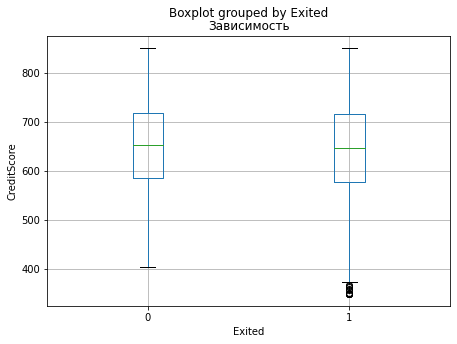

             mean median
              Age    Age
Exited                  
0       37.408389     36
1       44.837997     45


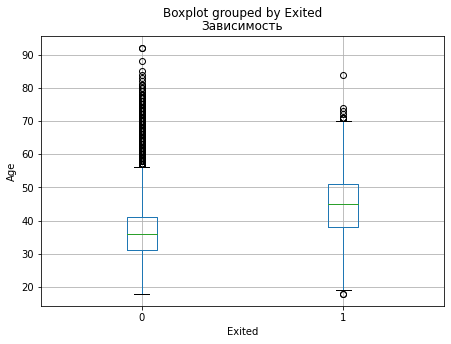

            mean median
          Tenure Tenure
Exited                 
0       5.022247    5.0
1       4.901834    5.0


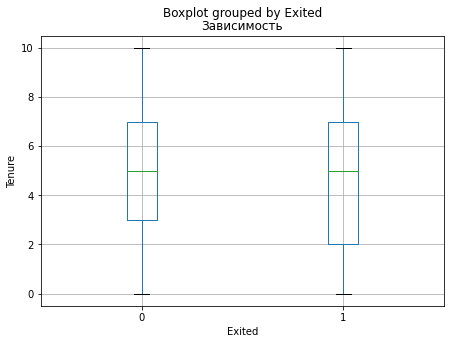

                mean     median
             Balance    Balance
Exited                         
0       72745.296779   92072.68
1       91108.539337  109349.29


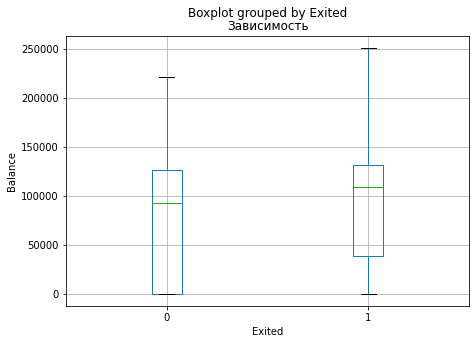

                mean        median
       NumOfProducts NumOfProducts
Exited                            
0           1.544267             2
1           1.475209             1


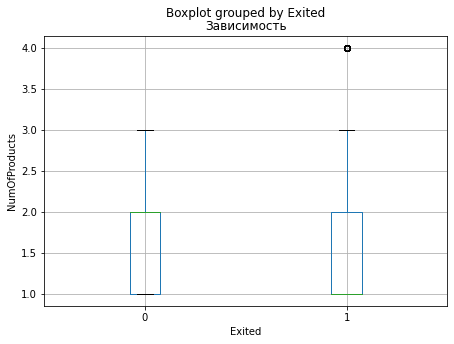

                  mean          median
       EstimatedSalary EstimatedSalary
Exited                                
0         99738.391772        99645.04
1        101465.677531       102460.84


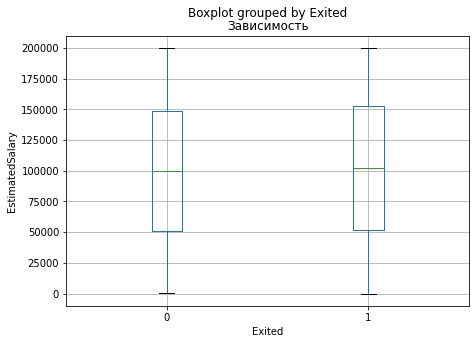

In [8]:
feautures_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in feautures_list:
    print(df.pivot_table(index="Exited", values = feature, aggfunc = ['mean','median']))
    df.boxplot(column = feature, by = "Exited", figsize=(7,5))
    plt.title("Зависимость" )
    plt.xlabel("Exited")
    plt.ylabel(feature)
    plt.show()

Из полученных графиков видно:

- Кредитный рейтинг покинувших банк клиентов практически не отличается от кредитного рейтинга остающихся клиентов банка (646 против 653)
- В среднем банк покидают клиенты возраста 36-37 лет
- Покидают банк клиенты в основном после 4-4.5 лет, действительные являются клиентами банка 4.5-5 лет
- В среднем клиенты банка пользуются 1-2 продтами, покинувшие банк клиенты пользовались в среднем 1 продуктом
- в зарплате оставшихся и покинувших банк клиентов дисбаланса нет.

Проверим данные на пропуски после заполнения пробелом и удаления столбцов


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Exited - целевой признак, все остальные столбцы - это признаки, которые влияют на результат классификации. Исходя из основной информации о признаках, можно сказать,OHE применим к столбцам Gender и Geography,которые являются категориальными признаками, а для числовых признаковб таких как 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' потребуется масштабирование, чтобы при моделировании признаки с более высоким значением не были засчитаны как более значимые, что приведет к некорректоному моделированию и модели низкого качества.

In [10]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Geography 
- всего 3 уникальных значения 'France', 'Spain', 'Germany' — исполльзуем метод OHE / ordinal encoding

In [11]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

Gender 
- 2 уникальных значения, для кодирования используем метод OHE / ordinal encoding.

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


В преобразованном датафрейме кол-во столбцов увеличелось на 1.Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки использованием drop_first=True.

Теперь делим исходные данные на тренировочную, валидационную и тестовую выборки в соотношении 60/20/20

In [13]:
features = df.drop(["Exited"], axis=1) # извлекаем признаки 
target = df["Exited"] # извлекаем целевой признак

#делим исходный датасет на обучающую и тестовую выборки в соотнощении 0.8/0.2
features_train, features_test, target_train, target_test = \
        train_test_split(features,target,train_size=0.8,random_state=12345, stratify=target)

#от обучающей выборки отделяем валидационную выборку в соотнbошении 0.25
features_train, features_valid, target_train, target_valid = \
        train_test_split(features_train,target_train,train_size=0.75,random_state=12345,stratify=target_train)


Проверяем размер выборок после разделения

In [14]:
display("Размер обучающей выборки")
display(features_train.shape)
display(target_train.shape)
display("Размер валидационной выборки")
display(features_valid.shape)
display(target_valid.shape)
display("Размер тестовой выборки")
display(features_test.shape)
display(target_test.shape)

'Размер обучающей выборки'

(6000, 11)

(6000,)

'Размер валидационной выборки'

(2000, 11)

(2000,)

'Размер тестовой выборки'

(2000, 11)

(2000,)

Заполненил пропущенные значения в столбце Tenure во всех выборках на медианное значение по столбцу Tenure в трейн выборке с помощью класса scikit-learn, который мы можем использовать для обработки недостающих значений в данных. С помощью этого класса мы можем заменить значения NaN(отсутствующие значения) в наборе данных трейн, валид и тест выборок медианой из трейн выборки.


In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(features_train[['Tenure']])

features_train[['Tenure']] = imp.transform(features_train[['Tenure']]) 
features_valid[['Tenure']] = imp.transform(features_valid[['Tenure']])
features_test[['Tenure']] = imp.transform(features_test[['Tenure']])


Проверяем выборки на пропущенные значения после обработки

In [16]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 5536 to 8193
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Age                6000 non-null   int64  
 2   Tenure             6000 non-null   float64
 3   Balance            6000 non-null   float64
 4   NumOfProducts      6000 non-null   int64  
 5   HasCrCard          6000 non-null   int64  
 6   IsActiveMember     6000 non-null   int64  
 7   EstimatedSalary    6000 non-null   float64
 8   Geography_Germany  6000 non-null   uint8  
 9   Geography_Spain    6000 non-null   uint8  
 10  Gender_Male        6000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 439.5 KB


In [17]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 9375 to 1674
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   float64
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 146.5 KB


In [18]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7837 to 1729
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   float64
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 146.5 KB


Производим масштабирование 

In [19]:
# числовые признаки, подлежащие масштабированию
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [20]:
#Масштабируем численные признаки Обучающей выборки 
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5536,-0.143332,0.577533,-0.001274,-1.220573,0.797767,1,1,1.029613,0,1,1
8530,1.632702,-0.564119,-1.092954,0.435807,-0.916018,1,0,0.237986,0,0,0
1762,1.116413,-0.468981,-1.456847,1.245822,-0.916018,1,1,-0.686104,0,0,0
9090,1.643028,0.006707,-0.001274,-1.220573,-0.916018,1,0,-0.391097,0,0,0
8777,-0.484083,-1.420358,-1.456847,1.421989,0.797767,1,0,-1.361559,0,1,1


In [21]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9375,0.094161,0.862946,-0.365167,0.757050,0.797767,1,0,-0.308325,1,0,1
9536,-1.031349,0.292120,1.818193,0.838881,-0.916018,1,0,-0.645029,1,0,0
6344,2.066384,0.196983,-0.729060,-1.220573,0.797767,1,0,0.498373,0,0,1
4357,1.085435,-0.278706,1.090407,-1.220573,0.797767,1,0,1.331035,0,0,1
9120,0.548495,1.814323,-0.365167,0.266421,-0.916018,0,1,-0.261760,0,1,1


In [22]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7837,2.066384,0.862946,-1.092954,-1.220573,-0.916018,1,0,1.202714,0,1,1
9505,0.011555,-1.039807,1.818193,0.052520,-0.916018,1,1,-0.443548,0,0,1
6208,0.662079,-0.468981,1.818193,-1.220573,0.797767,1,1,-0.347161,0,0,1
5642,1.364231,0.196983,-0.365167,-1.220573,-0.916018,1,0,0.568776,0,1,0
9643,-1.330797,0.196983,-1.092954,-1.220573,0.797767,1,1,0.223765,0,0,0


## Исследование задачи

Теперь, когда данные подготовлены, выборки определены, можно обучить несколько моделей и посмотреть их качественные характеристики, чтобы понять, что делать дальше. Выбрал модели Decision Tree, Random Forest и Logistic Regression.

Для начала посмотрел на сбалансированность целевого признака.

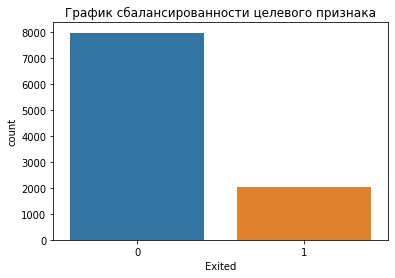

(1223,)
0.2
(4777,)
0.8


In [23]:
sns.countplot(df['Exited'])
plt.title("График сбалансированности целевого признака")
plt.show() 

yes= target_train [target_train ==1] 
no=target_train[target_train==0]
print(yes.shape) 
print(round(len(yes) / len(target_train), 2))
print(no.shape)
print(round(len(no) / len(target_train), 2))


Вывод:
 - в тренировочной выборке отрицательны значений  80% , положитительных 20%. Целевой признак не сбалансирован.

Создал процедуру, которая будет показывать все основные метрики качества моделей посредством отчета о  класификации и матрицу ошибок,будет считать метрику ROC-AUC score, которая нам покажет истинную и постоянную способность модели к прогнозированию.

In [24]:
def conf_m(model,target,features,prediction):
    report = classification_report(target,prediction)
    print(report)

    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    print("ROC-AUC_log:", roc_auc_score(target, probabilities_one))
    print()

    print("confusion_matrix")
    print(confusion_matrix(target,prediction))

    cm = confusion_matrix(target,prediction)
    ConfusionMatrixDisplay(cm).plot();
    plt.title("Матрица ошибок");
    
   

<font size="3"><b>Desigion Tree при исследовании на поиск лучших гиперпараметров</b></font>

На начальном этапе исследования дерева решений на валидационной выборке посмотрел, как на точность модели влияет гиперпараметр глубина дерева при значении всех остальных гиперпараметров "по умолчанию". Обработку организовал с помощью цикла, увеличивая на каждой итерации глубину дерева.

In [25]:
%%time

model_DT = None
best_result_dtc = 0

train_acc = []#список метрик accuracy на тренировке
valid_acc = []#список метрик accuracy на валидации

for depth in range(1, 31):
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=depth,\
            max_features=None, max_leaf_nodes=None,\
            min_impurity_decrease=0.0, min_impurity_split=None,\
            min_samples_leaf=1, min_samples_split=2,\
            min_weight_fraction_leaf=0.0,random_state=12345,\
            splitter='best')
    # обучиv модель с заданной глубиной дерева
    model.fit(features_train,target_train) # обучаем модель
    train_acc.append(model.score(features_train, target_train))#собираем метрику accuracy в список на тренировке     
    predictions = model.predict(features_valid) # получаем предсказания модели    
    result = accuracy_score(target_valid, predictions) # считаем качество модели
    valid_acc.append(result) #собираем метрику accuracy в список на валидации
    if result > best_result_dtc: #находим лучший результат
        model_DT = model
        best_depth_dtc = depth
        best_result_dtc = result
    print(f"max_depth = {depth} :", best_result_dtc)

print("Accuracy лучшей модели:", best_result_dtc)
print("Depth лучшей модели:", best_depth_dtc)

max_depth = 1 : 0.7965
max_depth = 2 : 0.836
max_depth = 3 : 0.836
max_depth = 4 : 0.8495
max_depth = 5 : 0.8495
max_depth = 6 : 0.855
max_depth = 7 : 0.8555
max_depth = 8 : 0.8555
max_depth = 9 : 0.8555
max_depth = 10 : 0.8555
max_depth = 11 : 0.8555
max_depth = 12 : 0.8555
max_depth = 13 : 0.8555
max_depth = 14 : 0.8555
max_depth = 15 : 0.8555
max_depth = 16 : 0.8555
max_depth = 17 : 0.8555
max_depth = 18 : 0.8555
max_depth = 19 : 0.8555
max_depth = 20 : 0.8555
max_depth = 21 : 0.8555
max_depth = 22 : 0.8555
max_depth = 23 : 0.8555
max_depth = 24 : 0.8555
max_depth = 25 : 0.8555
max_depth = 26 : 0.8555
max_depth = 27 : 0.8555
max_depth = 28 : 0.8555
max_depth = 29 : 0.8555
max_depth = 30 : 0.8555
Accuracy лучшей модели: 0.8555
Depth лучшей модели: 7
CPU times: user 1.05 s, sys: 2.28 ms, total: 1.05 s
Wall time: 1.06 s


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000

ROC-AUC_log: 0.8310575598711192

confusion_matrix
[[1367  226]
 [ 196  211]]


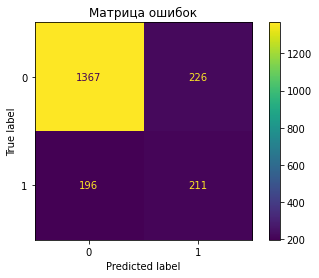

In [26]:
conf_m(model_DT,target_valid,features_valid,predictions)

Несмотря на высокое значение метрики accuracy(общая точность предсказания модели по всем классам), модель показала слабую метрику F1 (0.5),это значит, что модель идеально классифицирует каждое наблюдение в правильный класс всего лишь в 50% случаев. Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность. В нашем случае точность или, другими словами, процент доверия к решению модели, что выборка относится к классу Positive, составляет 48%. Полнота(recall) которая выявляет, какую долю положительных среди всех ответов выделила модель низкая (0.52). Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты.Если ближе к нулю — модель надо перепроверить и починить.

<font size="3"><b>Random Forest при исследовании на поиск лучших гиперпараметров</b></font>

На начальном этапе исследования задачи посмотрел модель случайного дерева решений на тренировочной выборке через кросс валидацию. Чтобы получить более оптимальные гиперпараметры тренировочную выборку увеличил на обьем валидационной. 

In [27]:
%%time
model_RF = RandomForestClassifier(random_state=12345)

#делим исходный датасет на обучающую и тестовую выборки в соотнощении 0.8/0.2
features_train_gs, features_test_gs, target_train_gs, target_test_gs = \
        train_test_split(features,target,train_size=0.8,random_state=12345)

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(features_train_gs[['Tenure']])

features_train_gs[['Tenure']] = imp.transform(features_train_gs[['Tenure']]) 
features_test_gs[['Tenure']] = imp.transform(features_test_gs[['Tenure']])

# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,20,40],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(model_RF,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(features_train_gs,target_train_gs)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print()
print('Best grid search score is: '+str(model_grid.best_score_))
print()
print('Best grid estimator is: '+str(model_grid.best_estimator_))


Best grid search hyperparameters are: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}

Best grid search score is: 0.8652509021518596

Best grid estimator is: RandomForestClassifier(max_depth=10, max_features=5, n_estimators=40,
                       random_state=12345)
CPU times: user 2min 1s, sys: 528 ms, total: 2min 2s
Wall time: 2min 2s


In [28]:
RF_prediction = model_grid.best_estimator_.predict(features_test_gs)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1573
           1       0.79      0.44      0.56       427

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

ROC-AUC_log: 0.8683924123566449

confusion_matrix
[[1524   49]
 [ 240  187]]


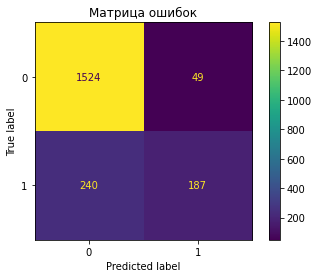

In [29]:
conf_m(model_grid.best_estimator_,target_test_gs,features_test_gs,RF_prediction)

Модель показала метрику F1 выше в случае с decision tree (0.56 против 0.50), это значит, что модель идеально классифицирует каждое наблюдение в правильный класс всего лишь в 56% случаев. а нам надо добиться показателя более 59%. ТОчность модели гораздо выше чем decision tree (79% против 48%). Полнота  ниже (44% против 52%)

<font size="3"><b>Logistic Regression при исследовании на поиск лучших гиперпараметров</b></font>

In [30]:
model_LR = LogisticRegression(random_state=12345,solver = 'liblinear')
model_LR.fit(features_train, target_train)
LR_prediction = model_LR.predict(features_valid)


              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1593
           1       0.67      0.21      0.32       407

    accuracy                           0.82      2000
   macro avg       0.75      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000

ROC-AUC_log: 0.7875672282451943

confusion_matrix
[[1551   42]
 [ 321   86]]


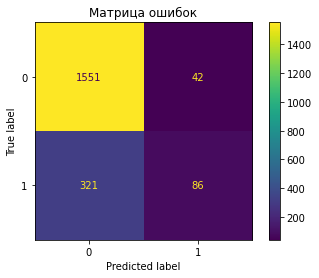

In [31]:
conf_m(model_LR,target_valid,features_valid,LR_prediction)

Модель LOgistic Regression показала самый слабый результат. F1 score всего лишь 0.32. Точность 67% Полнота всего 21%

Посмотрим как поведут себя наши модели при попытке изменить дисбаланс исходных данных.

## Борьба с дисбалансом

Рассмотрим 3 метода борьбы с дисбалансом классов:

- Взвешивание классов
- Увеличение выборки (upsampling)
- Уменьшение выборки (downsampling)

<font size="5"><b>Взвешивание классов</b></font>

<font size="3"><b>Desigion Tree при сбалансированности</b></font>

In [32]:
model_DT = DecisionTreeClassifier(criterion='gini',max_depth=8,\
                                    max_features=None, max_leaf_nodes=None,\
                                    min_impurity_decrease=0.0, min_impurity_split=None,\
                                    min_samples_leaf=1, min_samples_split=2,\
                                    min_weight_fraction_leaf=0.0,random_state=12345,\
                                    splitter='best', class_weight='balanced')
model_DT.fit(features_train, target_train)#обучаем
DT_prediction = model_DT.predict(features_valid)#тренируем


                   Desigion Tree ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.55       407

    accuracy                           0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.75      0.77      2000

ROC-AUC_log: 0.7963595336476692

confusion_matrix
[[1203  390]
 [ 101  306]]


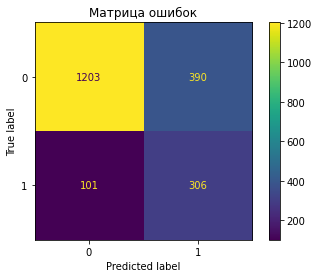

In [33]:
conf_m(model_DT,target_valid,features_valid,DT_prediction)

<font size="3"><b>Random Forest при сбалансированности</b></font>

In [34]:
model_RF = RandomForestClassifier(max_depth=10,
                                  n_estimators=40,
                                  min_samples_leaf=1,
                                  random_state=12345,
                                  class_weight='balanced')
model_RF.fit(features_train, target_train)#обучаем
RF_prediction = model_RF.predict(features_valid)#тренируем

                   Random Forest ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1593
           1       0.63      0.64      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000

ROC-AUC_log: 0.8614454207674547

confusion_matrix
[[1438  155]
 [ 146  261]]


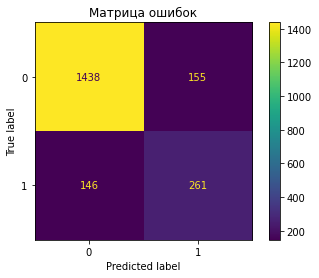

In [35]:
conf_m(model_RF,target_valid,features_valid,RF_prediction)

Добились метрики F1 (0.63) выше целевой

<font size="3"><b>Logistic Regression при сбалансированности</b></font>

In [36]:
model_LR = LogisticRegression(random_state=12345,solver = 'liblinear',class_weight='balanced')
model_LR.fit(features_train, target_train)#обучаем
LR_prediction = model_LR.predict(features_valid)#тренируем


                   Logistic Regression ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.40      0.72      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.74      2000

ROC-AUC_log: 0.791802588412758

confusion_matrix
[[1144  449]
 [ 113  294]]


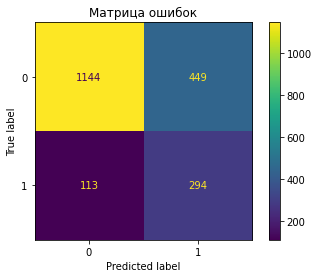

In [37]:
conf_m(model_LR,target_valid,features_valid,LR_prediction)

У линейной регресии  метрика F1 после балансировки классов тоже быросла (51% против 32%), такде значительно увеличилась полнота (72% против 21%), точность упала (40% против 67%)

**Вывод:**
- Лучшую метрику F1 после балансировки классов показала модель Random Forest (63%). 
- Decision Tree 55%
- Logistic Regression 51%
       

<font size="5"><b>Уменьшение выборки (downsampling)</b></font>             

In [38]:
# уменьшим выборку в 4 раза, так как положительный класс больше отрицательного в 4 раза
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # fractioning samples
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2417, 11)
(2417,)


<font size="3"><b>Desigion Tree на уменьшенной выборке</b></font>

In [39]:
model_DT = DecisionTreeClassifier(criterion='gini',max_depth=8,\
                                    max_features=None, max_leaf_nodes=None,\
                                    min_impurity_decrease=0.0, min_impurity_split=None,\
                                    min_samples_leaf=1, min_samples_split=2,\
                                    min_weight_fraction_leaf=0.0,random_state=12345,\
                                    splitter='best')#,class_weight='balanced')
model_DT.fit(features_downsampled, target_downsampled)
DT_prediction = model_DT.predict(features_valid)

                   Desigion Tree ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.44      0.71      0.55       407

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000

ROC-AUC_log: 0.7934344205530647

confusion_matrix
[[1231  362]
 [ 117  290]]


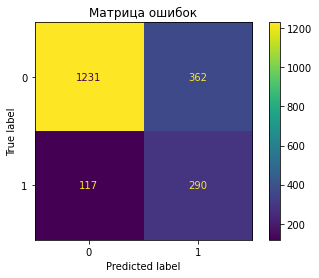

In [40]:
conf_m(model_DT,target_valid,features_valid,DT_prediction)

<font size="3"><b>Random Forest на уменьшенной выборке</b></font>

In [41]:
model_RF = RandomForestClassifier(max_depth=10, n_estimators=40, min_samples_leaf=1, \
                                  random_state=12345)
model_RF.fit(features_downsampled, target_downsampled)
RF_prediction = model_RF.predict(features_valid)


                   Random Forest ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000

ROC-AUC_log: 0.8650622887911024

confusion_matrix
[[1274  319]
 [  94  313]]


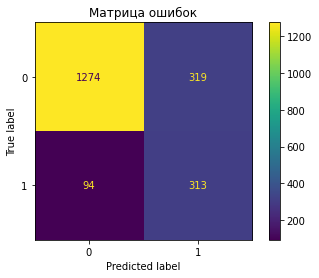

In [42]:
conf_m(model_RF,target_valid,features_valid,RF_prediction)

<font size="3"><b>Logistic Regression на уменьшенной выборке</b></font>

In [43]:
model_LR = LogisticRegression(random_state=12345,solver = 'liblinear')
model_LR.fit(features_downsampled, target_downsampled)
LR_prediction = model_LR.predict(features_valid)

                   Logistic Regression ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.72      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000

ROC-AUC_log: 0.7913244523414015

confusion_matrix
[[1129  464]
 [ 113  294]]


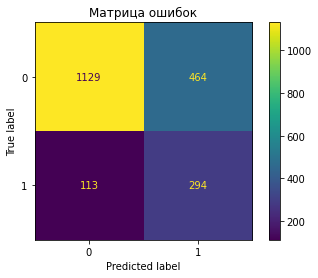

In [44]:
conf_m(model_LR,target_valid,features_valid,LR_prediction)

**Вывод:**
- Лучшую метрику F1 после уменьшения валидационной выборки показала модель Random Forest (60%). 
- Decision Tree 55%
- Logistic Regression 50%
       

<font size="5"><b>Увеличение выборки (upsampling)</b></font>               

In [45]:
# увеличим выборку в 4 раза, так как отрицательный класс больше положительного в 4 раза
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # сцепляем выборки
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # перемешиваем значения, чтобы они не шли друг за другом 
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9669, 11)
(9669,)


<font size="3"><b>Desigion Tree на увеличенной выборке</b></font>

In [46]:
model_DT = DecisionTreeClassifier(criterion='gini',max_depth=8,\
                                    max_features=None, max_leaf_nodes=None,\
                                    min_impurity_decrease=0.0, min_impurity_split=None,\
                                    min_samples_leaf=1, min_samples_split=2,\
                                    min_weight_fraction_leaf=0.0,random_state=12345,\
                                    splitter='best')
model_DT.fit(features_upsampled, target_upsampled)
DT_prediction = model_DT.predict(features_valid)

                    Desigion Tree ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.72      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.75      0.77      2000

ROC-AUC_log: 0.7936588360317174

confusion_matrix
[[1208  385]
 [ 114  293]]


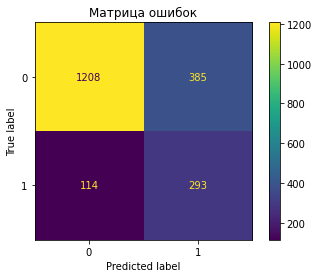

In [47]:
conf_m(model_DT,target_valid,features_valid,DT_prediction)

<font size="3"><b>Random Forest на увеличенной выборке</b></font>

In [48]:
model_RF = RandomForestClassifier(max_depth=10, n_estimators=40, min_samples_leaf=1,\
                                  random_state=12345)
model_RF.fit(features_upsampled, target_upsampled)
RF_prediction = model_RF.predict(features_valid)

                Random Forest ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1593
           1       0.55      0.70      0.62       407

    accuracy                           0.82      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000

ROC-AUC_log: 0.8608747422306744

confusion_matrix
[[1361  232]
 [ 121  286]]


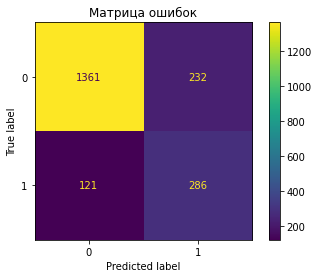

In [49]:
conf_m(model_RF,target_valid,features_valid,RF_prediction)

<font size="3"><b>LogisticRegression на увеличенной выборке</b></font>

In [50]:
model_LR = LogisticRegression(random_state=12345,solver = 'liblinear')
model_LR.fit(features_upsampled, target_upsampled)
LR_prediction = model_LR.predict(features_valid)

                 LOgistic Regression ключевые метрики и матрица ошибок

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000

ROC-AUC_log: 0.7918750800106732

confusion_matrix
[[1131  462]
 [ 111  296]]


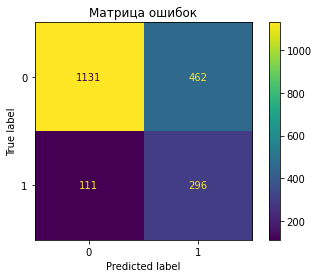

In [51]:
conf_m(model_LR,target_valid,features_valid,LR_prediction)

Вывод:

Лучшую метрику F1 после увеличения валидационной выборки показала модель Random Forest (62%).
Decision Tree 54%
Logistic Regression 51%

## Тестирование модели

Борьба с дисбалансом классов показала, что наилучщий результат дает модель Random Forest на балансировке классов (63%) и увеличении валидационной выбоки (62%). Ее и выбираем для финального тестирования. 

Проверим сохраняет ли качество наша выбранная модель RandomForest с лучшими гиперпараметрами на тестовой выборке.

In [52]:
model_RF = RandomForestClassifier(max_depth=10,
                                  n_estimators=40,
                                  min_samples_leaf=1,
                                  random_state=12345,
                                  class_weight='balanced')
model_RF.fit(features_train, target_train)#обучаем
RF_prediction = model_RF.predict(features_test)#тестируем

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.62      0.63      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.84      0.85      2000

ROC-AUC_log: 0.8590948421456897

confusion_matrix
[[1433  160]
 [ 151  256]]


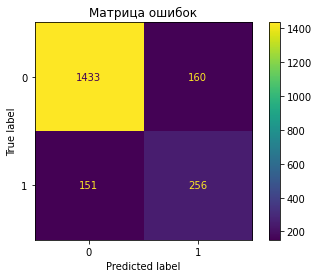

In [53]:
conf_m(model_RF,target_test,features_test,RF_prediction)

Как видим модель сохраняет качество на тестовой выборке, F1 = 62% что выше целевого показателя в 59%.

Для проверки нашей модели на адекватность создадим простейшую (dummy) модель, которая всегда предсказывает наиболее часто встречающийся класс. Так мы получим контрольные данные для сравнительной оценки построенной нами более сложной модели. К тому же мы сможем быть уверены в качестве ее работы, например, в том, что она выдает не просто набор случайно подобранных данных.

In [54]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345)#создаем простейшую модель
model_dc.fit(features_train, target_train)#обучаем модель на тренировочных данных
result_dc = model_dc.score(features_valid, target_valid)#получаем результат на проверочных данных
print('Accuracy DummyClassifier:', result_dc)

Accuracy DummyClassifier: 0.7965


Вывод

Качество модели RandomForest гораздо выше чем простейшей модели Dummy (0.84 против 0.80), это означает, что наша модель вполне вменяема и эффективна.

Чем больше площадь под кривой (AUC), тем лучше классификация. Идеальная или наилучшая кривая — это вертикальная линия от (0,0) до (0,1), которая тянется до (1,1). Это означает: модель всегда может различить положительные и отрицательные случаи.

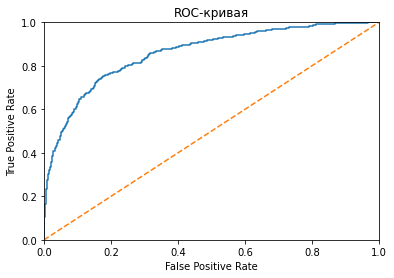

In [55]:
probabilities = model_RF.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Общий вывод**
-

Перед тем, как разделять выборку на обучающую, валидационную и тестовую, была проведена предварительная подготовка датасета:

- удалены 3 категориальных столбца CustomerId и Surname RowNumber, так как они никак не влияют на качество обучения (а если и влияют, то только в негативном ключе)
- Хитмэпом и матрицей корреляции проведена проверка на наличие сильной мультиколлинеарности, обнаружено что взаимосвязи между призрнаками слабые и практически отсутствуют
- 2 категориальных признака (Gender, Geography) были преобразованы в бинарные при помощи техники One-Hot Ecnoding
- Остальные количественным признаки ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] были масштабированы, чтобы при обучении не получилось так, что какой-то признак с более высоким значением был засчитан как более значимый
- Проверка датасета на наличие дисбаланса показала, что в целевом признаке наблюдается достаточно сильный дисбаланс классов - только 20% отражают факт ухода клиента.
- После разбиения данных на тренировочную валидационную и тестовые выборки были заполнены пропуски данных в столбце "Tenure" медианным значением по данному признаку из тренировочной выборки.

В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

Было рассмотрено 3 варианта борьбы с дисбалансом:
- взвешивание классов, 
- увеличение выборки (upsampling) 
- уменьшение выборки (downsampling)

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Наилучщий результат дает модель Random Forest при балансировке классов (63%). Ее и выбрали для финального тестирования. 

- Полнота 0.67
- Точность 0.59
- F1-мера 0.63
- AUC-ROC 0.86

Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели: 0.796 финальной модели: 0.84

На финальном тестировании модель Random Forest сохранила качество и показала следующие результаты, выше заявленной целевой F1 метрики в 59%

- Полнота 0.62
- Точность 0.63
- F1-мера 0.62
- AUC-ROC 0.84